# SIR Model with a Dynamic Force of Infection

In the previous etivity, you gained first experience with the concept of the force of infection. However, in the previous model, we made the unrealistic assumption that the force of infection can be expressed as a constant rate. As you have just learnt, in reality $\lambda$ changes over time, depending on the number of infected people in the population. This is what we are looking at in this etivity! 

Remember, the diagram for a simple SIR model looks as follows, except that now we define $\lambda$ as a function of the infection rate, $\beta$ (*beta*), and the proportion of the population that is infectious, $I/N$. 

<img src="Graphics_and_Data/m1_nb4_model_diagram.png">

### Question: Write out the differential equations for an SIR model with a dynamic force of infection on paper. Which assumptions are you making in this model structure?

Now that you have the differential equations, it's time to simulate this SIR model! In the cell below, copy-paste your code from the model function file that you created in the last etivity, and extend it to capture a dynamic force of infection. Our assumptions for the initial conditions ($S = 999999$, $I = 1$ and $R = 0$), simulation period (60 days) and $\gamma$ (0.1 days$^{-1}$) remain the same as in the previous etivity, and the daily infection rate $\beta$ equals 1.

Plot the curves of infection, susceptibility and recovery over time like in the previous etivities.

### Question: After how many days does the epidemic peak? What is the peak prevalence?

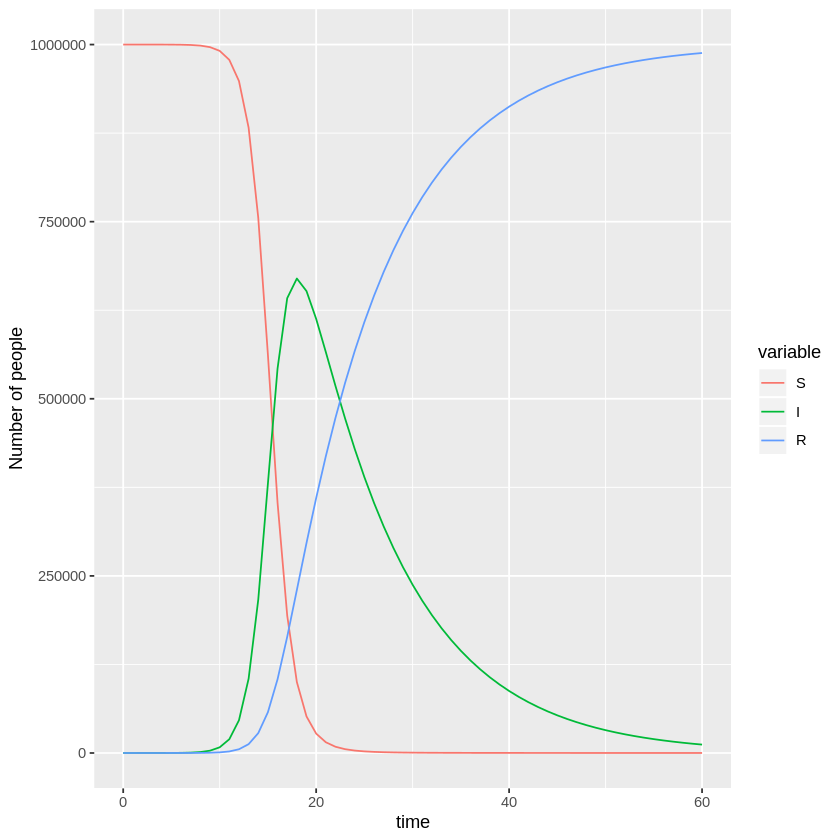

In [1]:
## YOUR CODE GOES HERE ##

# Hint: one addition you need to make in this etivity is to 
# calculate the total population size N to be able to
# calculate the proportion infected for the force of infection. 
# How you do this is up to you, but one option would be 
# to calculate it within the model function where you specify
# the differential equations.
library(deSolve)
library(reshape2)
library(ggplot2)

Initial_number_suscepted=999999
Initial_number_infected=1
Initial_number_recovered=0

Initial_states<-c(S=Initial_number_suscepted,I=Initial_number_infected,R=Initial_number_recovered)
parameters<- c(beta=1,gamma=0.1)


### YOUR CODE GOES HERE ###

# TIMESTEPS:
timestep<- seq(from=0,to=60,by=1)


### YOUR CODE GOES HERE ###

# SIR MODEL FUNCTION 
# We are renaming this to sir_model. 
# Remember to include the input arguments, 
# differential equations and output objects here.

sir_model <- function(timestep,Initial_states,parameters)
    {
    
    with(as.list(c(Initial_states,parameters)),
    {
        dS<- -beta*I*S/(Initial_number_suscepted+Initial_number_infected)
        dI<- (beta*I*S/(Initial_number_suscepted+Initial_number_infected))-(gamma*I)
        dR<- gamma*I
        
    
    
    return(list(c(dS,dI,dR)))
    })
    
}


#YOUR CODE#

# MODEL OUTPUT (solving the differential equations):
output <- as.data.frame(ode(y = Initial_states,
                            times = timestep, 
                            func = sir_model,
                            parms = parameters))
output_long<- melt(as.data.frame(output),id="time")
ggplot(data=output_long,
      aes(x=time,
         y=value,
         colour=variable,
         group=variable))+
         geom_line()+
         xlab("time")+
         ylab("Number of people")

In the second part of the etivity, you get to explore how your epidemic curve changes under different assumptions for $\beta$ and $\gamma$. To make this easier, we have written a function that allows you to plot the model output by entering different combinations of parameters. Run the example below, using the same parameter values as your model above, and check that your output was correct. If not, you should first go back to your code to see if you can find your mistake.

If everything works, you can start changing the values for $\beta$ and $\gamma$ below to explore how the epidemic behaviour changes under different parameter scenarios. We will look at this behaviour in more detail in the next few weeks!

### Question: How does the pattern of the epidemic change with different values for $\beta$ or $\gamma$? For example, how do these different parameter combinations affect when the peak of the epidemic happens, how many people are infected at the peak, and when the epidemic ends?

Note that at this point, the focus is on *describing* what you observe under different parameter assumptions - next week, you will delve deeper into *why* we observe these patterns in an epidemic.

In [2]:
# Run the R code needed first
require(deSolve)

sir_model <- function(time, state, parameters) {  
  
  with(as.list(c(state, parameters)), {  
  # tell R to look for variable names within the 
  # state and parameters objects
    
    N <- S+I+R
    
    # New: defining lambda as a function of beta and I:
    lambda <- beta * I/N
    
    # The differential equations
    dS <- -lambda * S               # people move out of (-) the 
                                    # S compartment at a rate lambda 
                                    # (force of infection)
    dI <- lambda * S - gamma * I    # people move into (+) the I compartment
                                    # from S at a rate lambda, 
                                    # and move out of (-) the I compartment 
                                    # at a rate gamma (recovery)
    dR <- gamma * I                 # people move into (+) the R compartment
                                    # from I at a rate gamma
    
    # Return the number of people in the S, I and R compartments at each
    # timestep 
    # (in the same order as the input state variables)
    return(list(c(dS, dI, dR))) 
  })
  
}

run_sir_model <- 
    function(beta, gamma, S0 = 999999, I0 = 1, R0 = 1, duration = 60) {
  
  initial_state_values <- c(S = S0,  # nearly the whole population we are 
                                     # modelling is susceptible to infection
                            I = I0,  # the epidemic starts with a single
                                     # infected person
                            R = R0)  # there is no prior immunity in the
                                     # population
  
  parameters <- c(beta = beta, # the rate of infection, 
                               
                  gamma = gamma)  # the rate of recovery, 
                                  # which acts on those infected

  times <- seq(from = 0, to = duration, by = 1) 
  
  output <- as.data.frame(ode(y = initial_state_values, 
                              times = times, 
                              func = sir_model,
                              parms = parameters))
  
  # Plotting the output
  plot(x = output$time,             # time on the x axis
       y = output$S,                # the number of susceptible people at
                                      # each timestep on the y axis
       type = "l",                  # type = "l" tells R we want lines 
                                      # rather than points
       ylim = c(0,(S0+I0+R0)),      # the limits of the y axis
                                      # (from 0 to the total number of 
                                      # people)
      
      xlab = "Time (days)", 
      ylab = "Number of people")    # add axis labels
  
  lines(x = output$time,            # add the number of
        y = output$I,                 # infected people at each
        col = "red")                  # timestep on the y axis
                                                    
                                                   
  lines(x = output$time,            # number of recovered
        y = output$R,                 # people at each
        col = "blue")                 # timestep on the y axis
                                                  
  legend(x = "right",                     # add a legend on the right-hand
                                            # side of the plot
         legend = c("S", "I", "R"),       # labels S, I and R for black, 
         col = c("black", "red", "blue"),   # red, blue lines respectively
         lty = c(1,1))                    # both lines are
                                            # solid linetype (lty = 1)
  title(main = paste("beta =", beta,      # main title
                     ", gamma =", gamma))
}

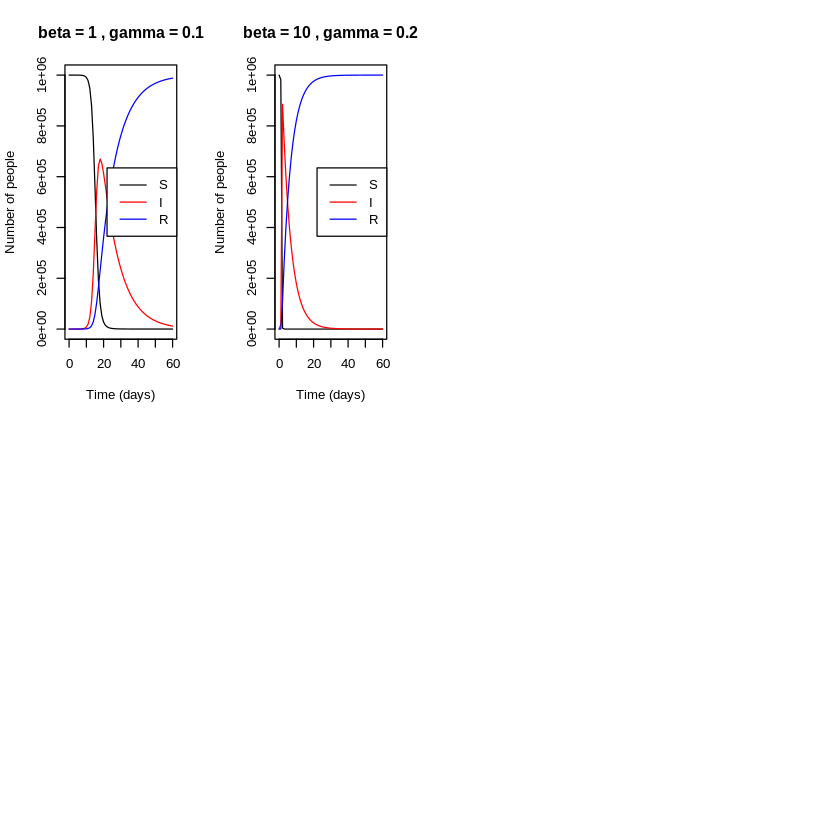

In [4]:
# Prepare the format for the plot display
par(mfrow = c(2,4))  # Show 2*4 separate plots in one page
                     # (2 rows, 4 per row)

# Run the model and plot the output with different beta and gamma values.
# You might also have to change the time that you run the model for,
# by changing the value of the duration argument, 
# in units of days (for example, to reproduce your model above, 
# this would be duration = 60).

run_sir_model(beta = 1, 
              gamma = 0.1,
              duration = 60)
run_sir_model(beta = 10, 
              gamma =0.2,
              duration = 60) 

# Repeat the run_sir_model() command here for every parameter combination 
# you want to try, and adapt the par() command above depending 
# on how many plots you want to look at

Lastly, use the solution code to confirm that your model code is working properly. Make any corrections necessary. It’s worth getting this right at this stage, as this is the basic model structure that you will be building on in the following weeks. Use the corrected code to update your model function file to build on in the following weeks.